---
title: "Mean separation comparison"
subtitle: "Friends don't let you compare means without looking at the underlying distributiion by [cxli233](https://github.com/cxli233/FriendsDontLetFriends)"
author: Marco Dalla Vecchia
date: 12/06/2024
---

In [1]:
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# # Aesthetics
plt.rcParams["font.family"] = "serif" # use Serif style as default font
sns.set_style('ticks')

In [2]:
# Fix random seed for creating random data
np.random.seed(69)

# Create a group with random value from NORMAL distribution
y1 = np.random.normal(1,1, 100)
# Create another group with random value from LOGNORMAL distribution
y2 = np.random.lognormal(
    mean=np.log(1**2/np.sqrt(1**2 + 1**2)),
    sigma=np.sqrt(np.log(1+(1**2/1**2))),
    size=100
    )

y = np.concatenate([y1,y2])

# X labels for the plot
x = np.concatenate([
    np.repeat('Group 1', 100),
    np.repeat('Group 2', 100),
])

# Create full dataset
df = pd.DataFrame({'response': y, 'group': x})

# Check that the means are actually very close
print(np.mean(y1), np.mean(y2))

0.9615201081808231 1.0213897699064436


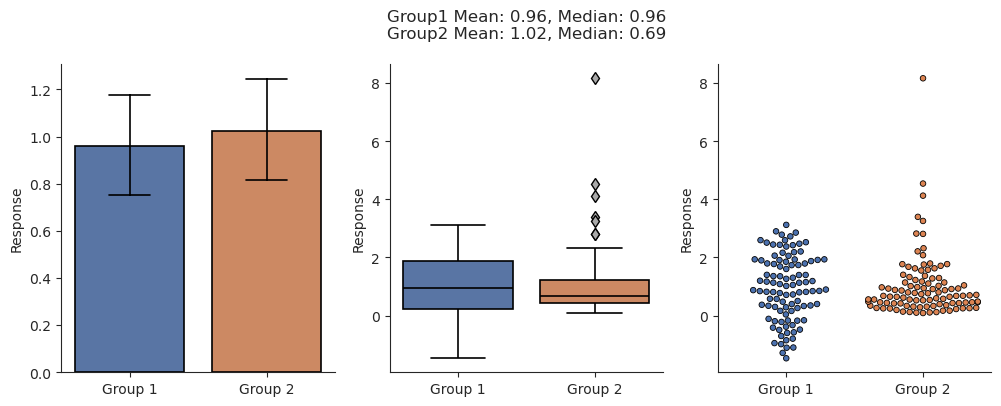

In [3]:
#| label: fig-mean-sep
#| fig-cap: "Replica of mean separation figure by @li_2024"

fig, axes = plt.subplots(1,3, figsize=(12,4))

sns.barplot(
    data=df, x='group', y='response', hue='group', palette='deep',
    capsize=0.3, err_kws={'color':'black', 'linewidth': 1.2}, edgecolor='black', lw=1.2, 
    ax=axes[0]
)

sns.boxplot(
    data=df, x='group', y='response', hue='group', palette='deep',
    flierprops={"marker": "d", "markerfacecolor":"darkgray"},
    boxprops={"edgecolor":'black', 'linewidth': 1.2},
    medianprops={'color':'black', 'linewidth': 1.2},
    linecolor="black", linewidth=1.2,
    ax=axes[1]
)

sns.swarmplot(
    data=df, x='group', y='response', hue='group', palette='deep',
    linewidth=0.6, edgecolor='black',
    size=4, ax=axes[2]
)

sns.despine()

for ax in axes:
    ax.set_ylabel('Response')
    ax.set_xlabel('')

axes[1].set_title(
    "Group1 Mean: {:.2f}, Median: {:.2f}\nGroup2 Mean: {:.2f}, Median: {:.2f}\n"
    .format(np.mean(y1), np.median(y1), np.mean(y2), np.median(y2)),
)

plt.savefig('../figures/mean-separation.pdf', bbox_inches='tight', pad_inches=0, transparent=True)